# Machine Learning 

#### Project Overview
##### The goal is to predict the likelihood of a customer subscribing to a term deposit based on historical data, demographic information, and customer interactions, enabling the bank to implement targeted marketing campaigns and personalized services to maximize the effectiveness of their marketing efforts and enhance overall customer satisfaction and loyalty.

## Step 1: Import Packages and Data

#### Data Source: 
##### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
##### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
bank = pd.read_csv("bank.csv")

In [17]:
bank

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


## Step 2: Data Wrangling/Cleansing

In [19]:
bank.head(3)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."


In [20]:
#Split columns using the semicolon delimeter 

bank = bank['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(";",expand =True, n=16)

In [21]:
bank.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,30,"""unemployed""","""married""","""primary""","""no""",1787,"""no""","""no""","""cellular""",19,"""oct""",79,1,-1,0,"""unknown""","""no"""
1,33,"""services""","""married""","""secondary""","""no""",4789,"""yes""","""yes""","""cellular""",11,"""may""",220,1,339,4,"""failure""","""no"""


In [22]:
#Rename each column 

In [24]:
bank = bank.rename(columns={0:"Age", 1:"Job", 2:"Marital", 3:"Education", 4:"Default", 5:"Balance", 6:"Housing", 7:"Loan", 8:"Contact", 9:"Day", 10:"Month", 11:"Duration", 12:"Campaign", 13:"pday", 14:"Previous",15:"poutcome", 16:"y"})

In [32]:
#Replace the quotations within each column 

In [34]:
bank["Job"] = bank["Job"].str.replace('"'," ")

In [36]:
bank["Marital"] = bank["Marital"].str.replace('"'," ")

In [38]:
bank["Education"] = bank["Education"].str.replace('"'," ")

In [40]:
bank["Default"] = bank["Default"].str.replace('"'," ")

In [42]:
bank["Housing"] = bank["Housing"].str.replace('"'," ")

In [44]:
bank["Loan"] = bank["Loan"].str.replace('"'," ")

In [46]:
bank["Contact"] = bank["Contact"].str.replace('"'," ")

In [48]:
bank["Month"] = bank["Month"].str.replace('"'," ")

In [50]:
bank["Previous"] = bank["Previous"].str.replace('"'," ")

In [52]:
bank["poutcome"] = bank["poutcome"].str.replace('"'," ")

In [54]:
bank["y"] = bank["y"].str.replace('"'," ")

In [56]:
bank["y"]= bank["y"].astype("str").str.strip()

In [58]:
bank.head(3)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,pday,Previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [60]:
bank.isnull().sum()

Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing      0
Loan         0
Contact      0
Day          0
Month        0
Duration     0
Campaign     0
pday         0
Previous     0
poutcome     0
y            0
dtype: int64

# DATA ANALYSIS FOR ENTIRE DATAFRAME<b>
    

## Step 3: Data Visualization

##### Analyze age distribution

##### What is the average, maximum and minimum balance in our data?

##### Create a new column based on whether the bank balance of our customer is positive or negative? For the ones with a negative balance, how does the distribution across marital categories look like?

##### Bank balance by education

##### Top 10 people with most money- what kind of jobs they do?

##### Split the data into our customer data:
##### Most of our customers have what kind of profession?
##### How many of our customers have defaulted before? Have most of our customers defaulted?
##### For the ones that have defaulted, how many have a negative balance?

##### For the different age groups in our data what age groups have positive balance vs negative balance

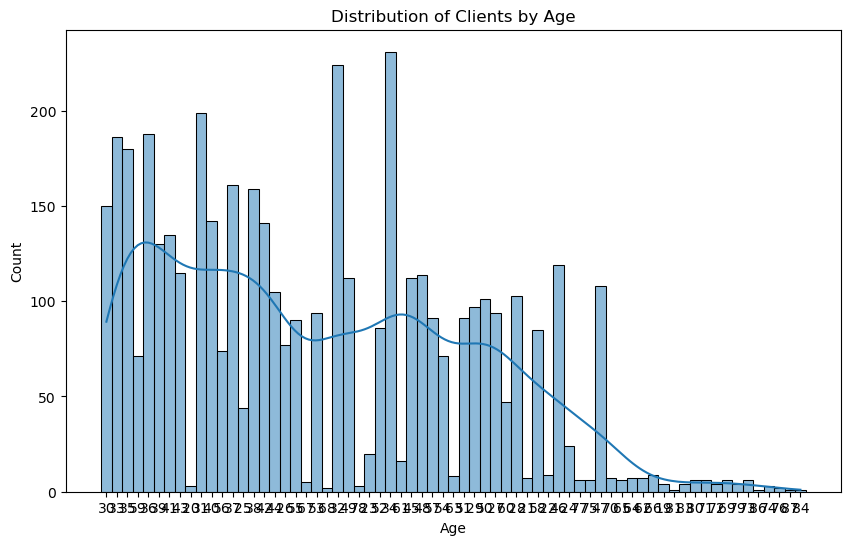

In [115]:
plt.figure(figsize=(10, 6))
sns.histplot(data=bank, x= 'Age', kde=True, bins=20)  
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Clients by Age')
plt.show()

<Axes: title={'center': 'Top 15 Ages'}, xlabel='Age', ylabel='Frequency'>

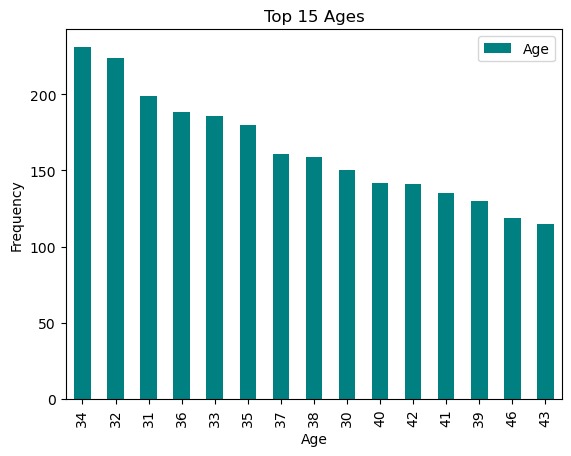

In [116]:
bank["Age"].astype("int").value_counts().sort_values(ascending =False).head(n=15).plot(kind="bar", title = "Top 15 Ages", xlabel ="Age", ylabel = "Frequency", color = "teal", legend=True)

#### Statistics For Balance  

In [118]:
bank["Balance"].astype("int").sum()

6431836

In [120]:
#Average Balance per Customer

In [122]:
bank["Balance"].astype("int").mean().round()

1423.0

In [124]:
bank["Balance"].describe()

count     4521
unique    2353
top          0
freq       357
Name: Balance, dtype: object

In [126]:
#balance_checker -- "Positive Balance" vs. "Negative Balance" User

In [128]:
def balance_checker(amount):
    if amount<0:
        return "Negative Balance"
    if amount>0:
        return "Positive Balance"
    else:
        return "Not Found"

In [129]:
bank["Balance_Checker"] = bank["Balance"].astype("int").apply(balance_checker)

In [132]:
bank.head(3)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,pday,Previous,poutcome,y,Balance_Checker
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Positive Balance
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Positive Balance
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Positive Balance


<Axes: title={'center': 'Customer Balance Trend'}, ylabel='Amount'>

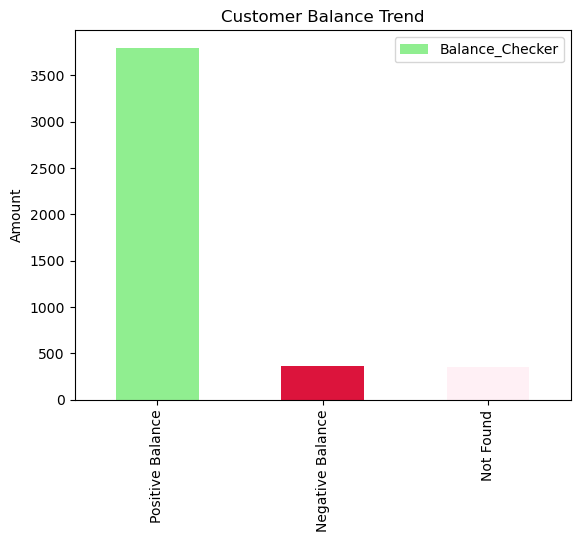

In [136]:
colors = ['lightgreen','crimson','lavenderblush']
    
bank["Balance_Checker"].value_counts().plot(kind="bar",legend = True, ylabel="Amount", title = "Customer Balance Trend",color=colors)

In [138]:
my_group = bank[bank["Balance_Checker"]=="Negative Balance"].groupby("Marital")


<Axes: title={'center': 'Negative Balance Customer Marital Status'}, xlabel='Marital', ylabel='Frequency'>

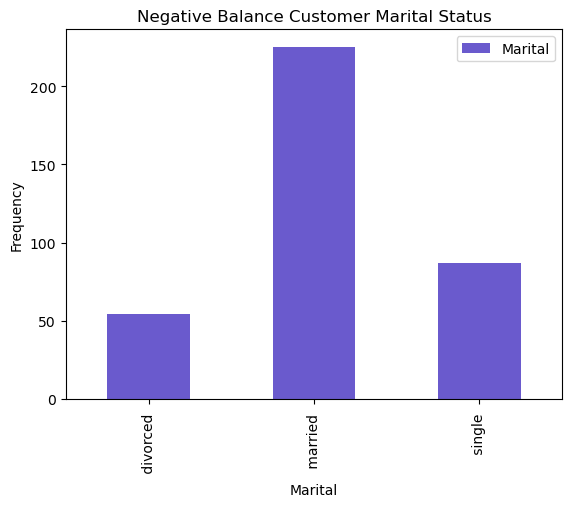

In [139]:
my_group.agg({"Marital":"count"}).plot(kind="bar",legend=True, title = "Negative Balance Customer Marital Status", ylabel = "Frequency", color = "slateblue")

In [140]:
bank["Balance"] = bank["Balance"].astype("int")

In [141]:
#Group Mean Balance by Education to reveal a relationship 
edu_group = bank.groupby("Education").agg({"Balance":"mean"}).sort_values(by="Balance",ascending=False)

In [143]:
edu_group

,Balance
Education,
tertiary,1775.423704
unknown,1701.245989
primary,1411.544248
secondary,1196.814397


In [144]:
#Top 15 Ages with the Greatest Balance

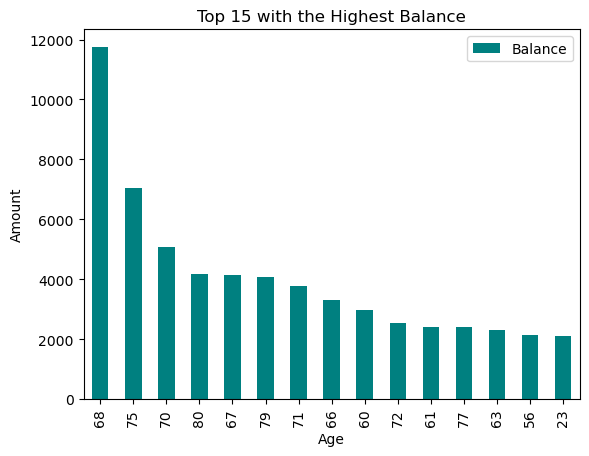

In [150]:
age_group = bank.groupby("Age").agg({"Balance":"mean"}).sort_values(by="Balance",ascending=False).head(n=15).plot(kind="bar", title = "Top 15 with the Highest Balance", ylabel="Amount", color="teal")

In [151]:
age_group

<Axes: title={'center': 'Top 15 with the Highest Balance'}, xlabel='Age', ylabel='Amount'>

In [152]:
#Top 10 Users with the Highest Balance 

In [155]:
Top_10 = bank["Balance"].sort_values(ascending= False).head(n=10)

In [156]:
Top_10 = bank[bank.index.isin(Top_10.index)]

In [157]:
Top_10

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,pday,Previous,poutcome,y,Balance_Checker
871,31,housemaid,single,primary,no,26965,no,no,cellular,21,apr,654,2,-1,0,unknown,yes,Positive Balance
1031,49,retired,single,primary,no,25824,no,no,unknown,17,jun,94,1,-1,0,unknown,no,Positive Balance
1483,43,technician,single,tertiary,no,27733,yes,no,unknown,3,jun,164,7,-1,0,unknown,no,Positive Balance
1881,36,management,married,tertiary,no,27359,yes,no,unknown,3,jun,71,2,-1,0,unknown,no,Positive Balance
2196,54,management,divorced,tertiary,no,26306,yes,no,cellular,11,feb,27,1,84,3,failure,no,Positive Balance
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,aug,205,2,-1,0,unknown,no,Positive Balance
3011,50,services,married,secondary,no,26394,no,no,cellular,25,aug,206,4,-1,0,unknown,no,Positive Balance
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no,Positive Balance
3830,57,technician,married,tertiary,no,27069,no,yes,unknown,20,jun,174,3,-1,0,unknown,no,Positive Balance
4047,75,retired,married,secondary,no,26452,no,no,telephone,15,jul,219,2,-1,0,unknown,no,Positive Balance


In [158]:
Top_10["Job"].value_counts()

 retired          3
 technician       2
 management       2
 housemaid        1
 entrepreneur     1
 services         1
Name: Job, dtype: int64

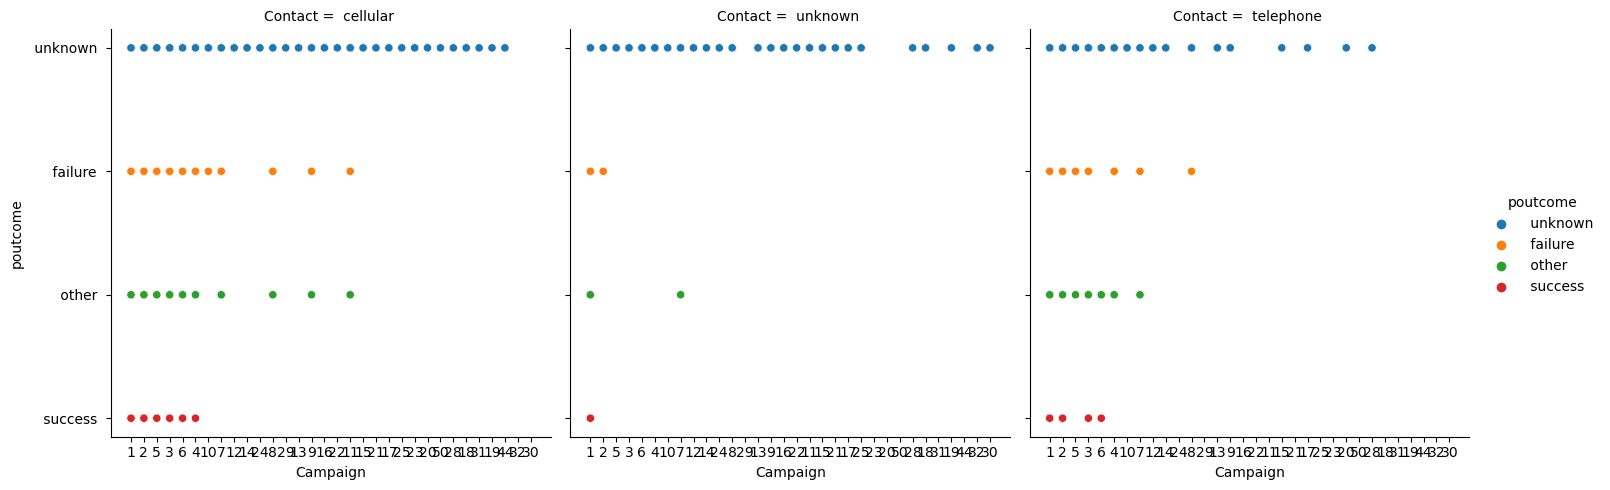

In [159]:
sns.relplot(
    data=bank,
    x="Campaign", y="poutcome", col="Contact", hue="poutcome")

# DATA ANALYSIS FOR CUSTOMERS

In [161]:
bank["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [162]:
Customers = bank[bank["y"]=="yes"]

In [163]:
Customers

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,pday,Previous,poutcome,y,Balance_Checker
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes,Positive Balance
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes,Positive Balance
33,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes,Positive Balance
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes,Positive Balance
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes,Positive Balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes,Positive Balance
4503,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes,Positive Balance
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes,Positive Balance
4505,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes,Positive Balance


In [164]:
#Profession, how many have defaulted, have most defaulted, for those defaulted how many negative balance, which age group has a + vs. - balance

<Axes: title={'center': "Our Customer's Professions"}, xlabel='Profession', ylabel='Frequency'>

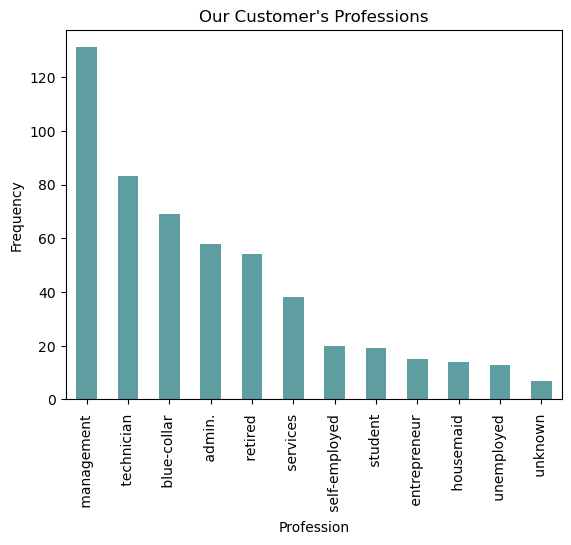

In [165]:
Customers["Job"].value_counts().plot(kind ="bar", title= "Our Customer's Professions", xlabel= "Profession", ylabel = "Frequency", color="cadetblue")

<Axes: title={'center': 'Top 15 Ages of our Customers'}, xlabel='Age', ylabel='Frequency'>

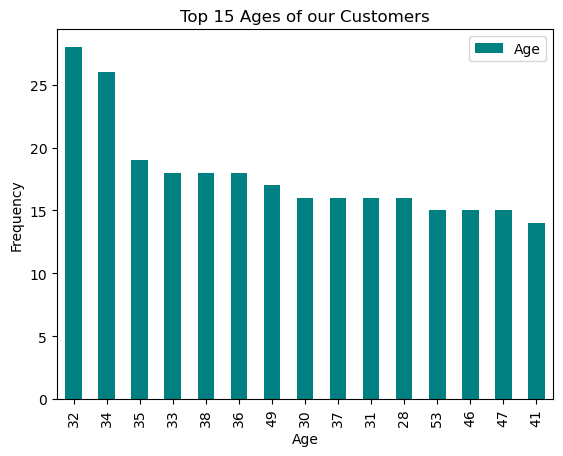

In [166]:
Customers["Age"].astype("int").value_counts().sort_values(ascending =False).head(n=15).plot(kind="bar", title = "Top 15 Ages of our Customers", xlabel ="Age", ylabel = "Frequency", color = "teal", legend=True)

<Axes: title={'center': 'Customer Default Status'}, ylabel='Frequency'>

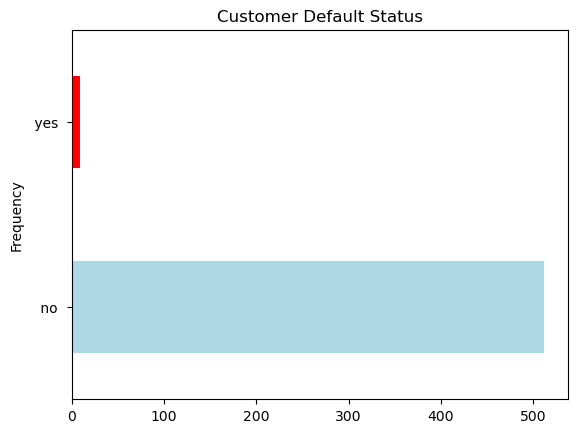

In [167]:
col = ["lightblue", "red"]
Customers["Default"].value_counts().plot(kind="barh", title= "Customer Default Status", ylabel ="Frequency", color = col)

In [171]:
Customers["Default"].value_counts()

 no      512
 yes       9
Name: Default, dtype: int64

In [172]:
Customers["Balance_Checker"].value_counts()

Positive Balance    461
Negative Balance     31
Not Found            29
Name: Balance_Checker, dtype: int64

<Axes: title={'center': "Customer's Balance Trends"}, xlabel='Frequency'>

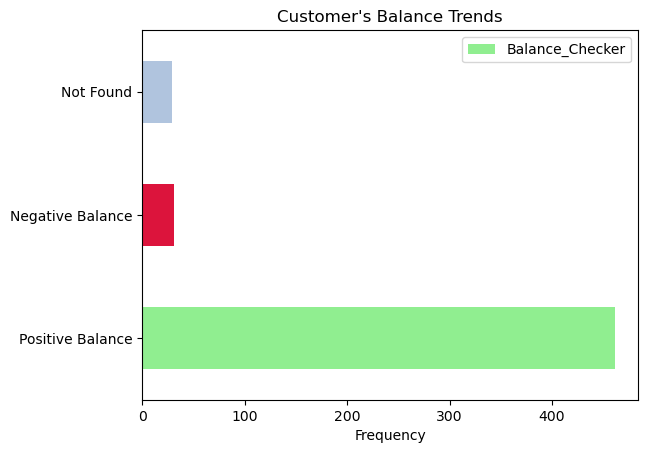

In [177]:
Co = ["lightgreen", "crimson", "lightsteelblue"]
Customers["Balance_Checker"].value_counts().plot(kind="barh", legend=True, title="Customer's Balance Trends", color = Co, xlabel="Frequency")

In [178]:
Neg_Bal = Customers.loc[(Customers["Balance_Checker"] == "Negative Balance")]

<Axes: title={'center': 'Customers Who Defaulted and Have A Negative Balance'}, xlabel='Frequency'>

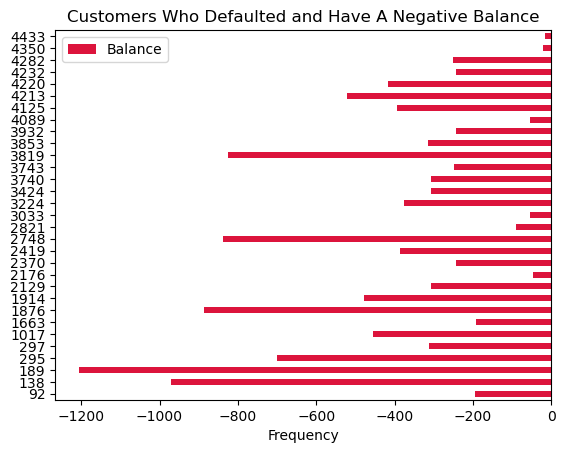

In [179]:
Neg_Bal.plot(kind="barh", xlabel = "Frequency", color = "crimson", title ="Customers Who Defaulted and Have A Negative Balance", legend = True)

In [180]:
Customers.groupby("Education").agg({"Balance":"mean"}).sort_values(by="Balance",ascending=False)

,Balance
Education,
unknown,2378.473684
primary,1940.921875
tertiary,1712.186528
secondary,1302.559184


In [181]:
Cust_Top_10 = bank["Balance"].sort_values(ascending= False).head(n=10)

In [197]:
Cust_Top_10 = bank[bank.index.isin(Top_10.index)]

In [199]:
Cust_Top_10

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,pday,Previous,poutcome,y,Balance_Checker
871,31,housemaid,single,primary,no,26965,no,no,cellular,21,apr,654,2,-1,0,unknown,yes,Positive Balance
1031,49,retired,single,primary,no,25824,no,no,unknown,17,jun,94,1,-1,0,unknown,no,Positive Balance
1483,43,technician,single,tertiary,no,27733,yes,no,unknown,3,jun,164,7,-1,0,unknown,no,Positive Balance
1881,36,management,married,tertiary,no,27359,yes,no,unknown,3,jun,71,2,-1,0,unknown,no,Positive Balance
2196,54,management,divorced,tertiary,no,26306,yes,no,cellular,11,feb,27,1,84,3,failure,no,Positive Balance
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,aug,205,2,-1,0,unknown,no,Positive Balance
3011,50,services,married,secondary,no,26394,no,no,cellular,25,aug,206,4,-1,0,unknown,no,Positive Balance
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no,Positive Balance
3830,57,technician,married,tertiary,no,27069,no,yes,unknown,20,jun,174,3,-1,0,unknown,no,Positive Balance
4047,75,retired,married,secondary,no,26452,no,no,telephone,15,jul,219,2,-1,0,unknown,no,Positive Balance


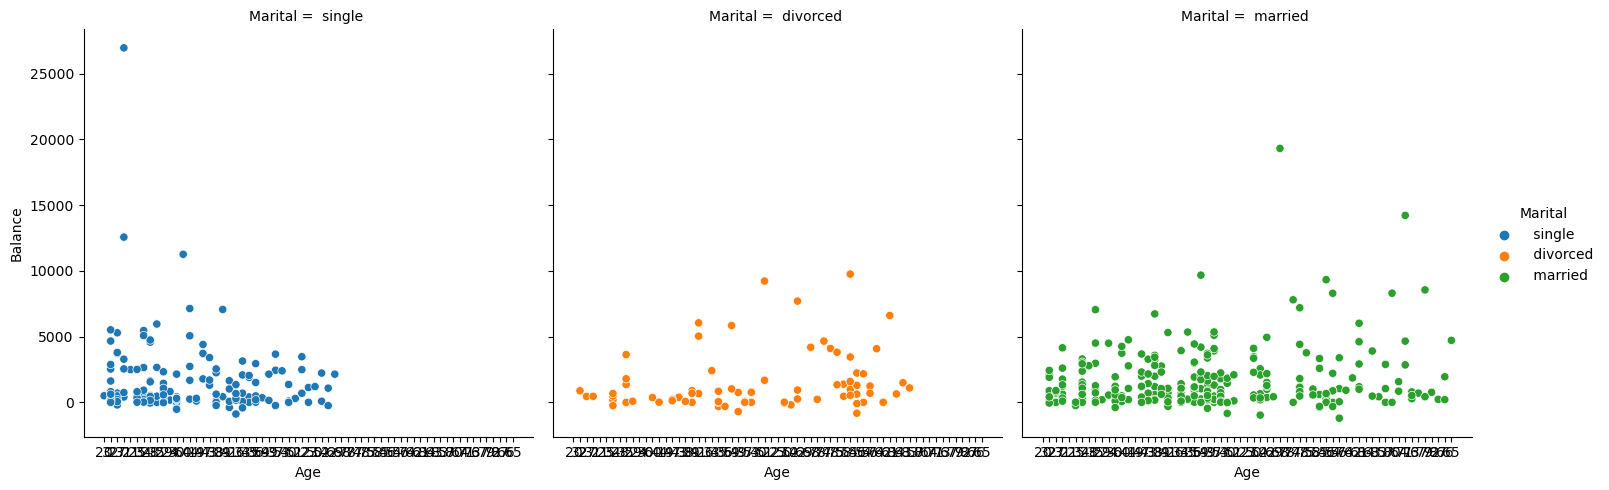

In [201]:
sns.relplot(
    data=Customers,
    x="Age", y="Balance", col="Marital", hue="Marital")

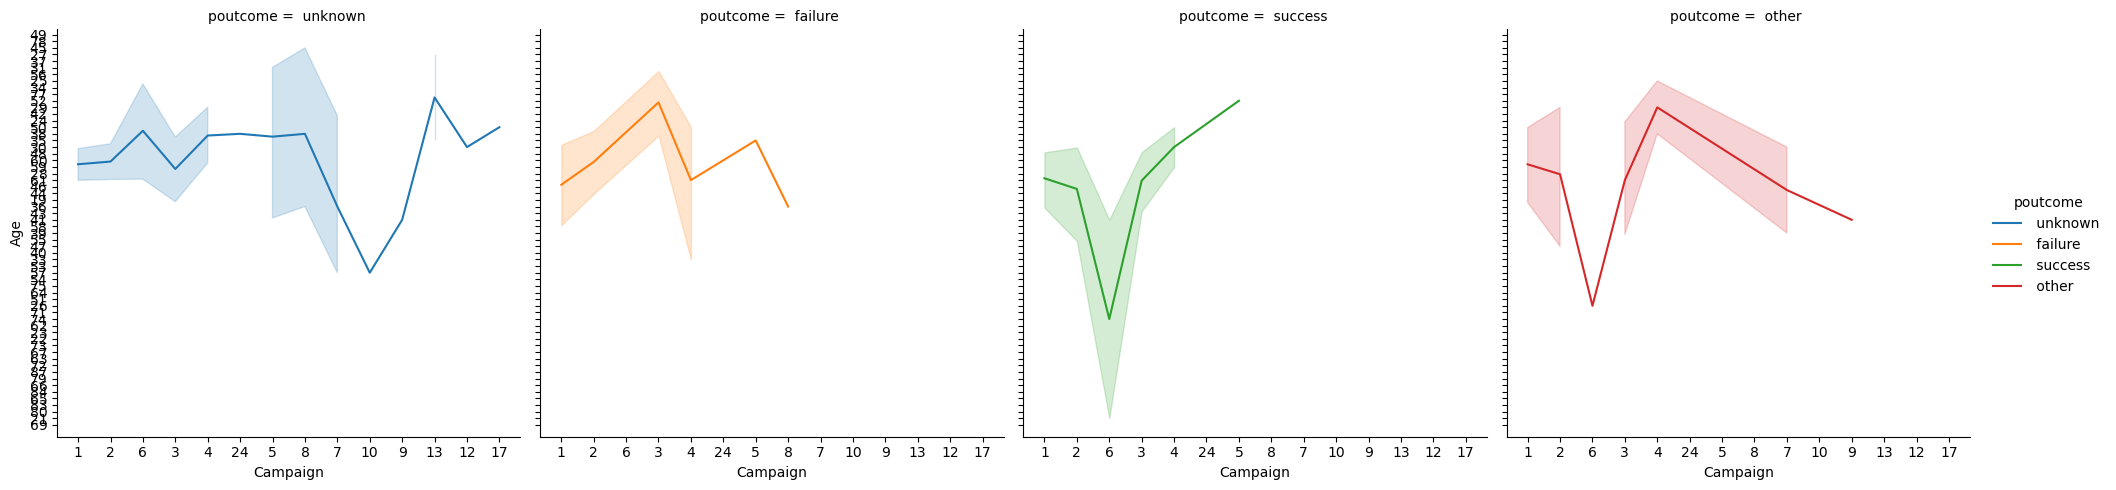

In [203]:
sns.relplot(data=Customers, x="Campaign", y="Age", col="poutcome", kind="line", hue="poutcome")

# Classification Model 

### Step 4: Machine Learning

In [67]:
#Classification Code -- Using the Variables: Housing, Y, Age

## Housing Versus Age

In [238]:
bank["Housing"]= bank["Housing"].astype("str").str.strip()

In [69]:
#Create a Function to assign Binary values to Quantative 

In [240]:
def into_number(column_name):
    if column_name=="yes":
        return 1
    elif column_name=="no":
        return 0
    else:
        return "column name not found"

In [242]:
bank["Outcome_Variable"] = bank["Housing"].apply(into_number)

<Axes: title={'center': 'Count of Housing'}, xlabel='No=1 Yes=1', ylabel='Frequency'>

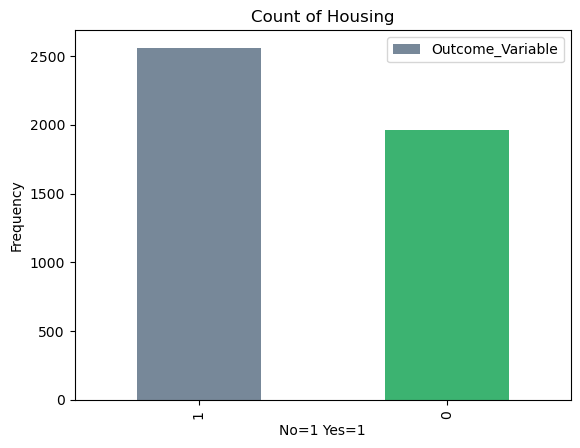

In [244]:
Co_CC = ["lightslategray","mediumseagreen"]
bank["Outcome_Variable"].value_counts().plot(kind="bar",legend=True, title="Count of Housing", xlabel ="No=1 Yes=1", ylabel="Frequency", color=Co_CC)

In [ ]:
#Create a logistic regression plot to show the probability of an event taking place

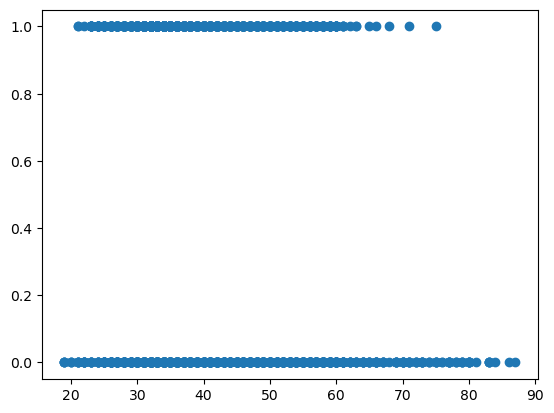

In [246]:
#Variables - Age and Outcome
plt.scatter(x=bank.Age.astype("float"),y=bank.Outcome_Variable.astype("float"))

In [248]:
from sklearn.model_selection import train_test_split

In [250]:
#Defining variables for Training 
X_train, X_test, Y_train, Y_test = train_test_split(bank[["Age","Balance"]],bank["Outcome_Variable"],test_size=0.1)

In [258]:
X_train
Y_train

1571    1
4180    1
414     0
4338    1
902     0
       ..
2501    1
1901    1
1845    1
1138    0
667     0
Name: Outcome_Variable, Length: 4068, dtype: int64

In [260]:
X_test
Y_test

496     1
3265    0
2582    1
2227    0
1732    1
       ..
1531    1
2279    1
1207    1
169     1
1447    1
Name: Outcome_Variable, Length: 453, dtype: int64

In [252]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
model.predict(X_test)

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,

In [254]:
model.score(X_test,Y_test)

0.609271523178808

In [267]:
model.predict(x_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,

## Age Versus Customers

In [150]:
def into_numbers(column_name):
    if column_name=="yes":
        return 1
    elif column_name=="no":
        return 0
    else:
        return "column name not found"

In [152]:
bank["Outcome"] = bank["y"].apply(into_numbers)

<Axes: title={'center': 'Count of Customers'}, xlabel='No=1 Yes=1', ylabel='Frequency'>

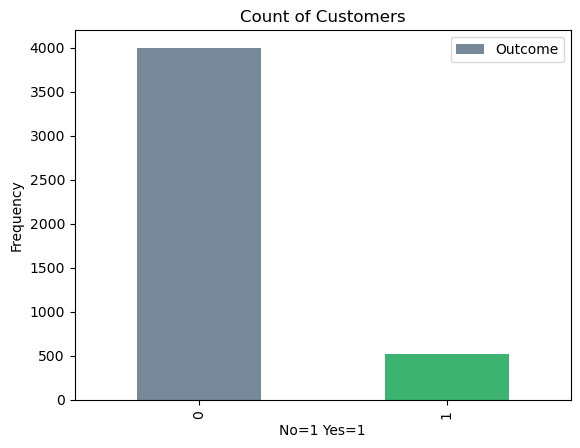

In [200]:
Co_C = ["lightslategray","mediumseagreen"]
bank["Outcome"].value_counts().plot(kind="bar",legend=True, title="Count of Customers", xlabel ="No=1 Yes=1", ylabel="Frequency", color=Co_C)

In [ ]:
#Create a logistic regression plot to show the probability of an event taking place

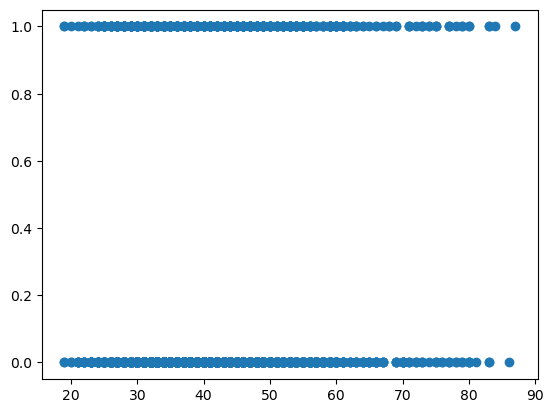

In [202]:
#Variables - Age and Outcome
plt.scatter(x=bank.Age.astype("float"),y=bank.Outcome.astype("float"))

In [204]:
from sklearn.model_selection import train_test_split

In [206]:
#Defining variables for Training 
x_train, x_test, y_train, y_test = train_test_split(bank[["Age","Balance"]],bank["Outcome"],test_size=0.1)

In [208]:
x_train
y_train

3440    0
1867    0
3628    0
3203    0
227     0
       ..
4058    0
1987    0
4231    1
2900    0
1889    1
Name: Outcome, Length: 4068, dtype: int64

In [210]:
x_test
y_test

1923    0
1431    1
3235    0
588     0
2079    0
       ..
228     0
1926    0
3300    0
2869    0
2122    1
Name: Outcome, Length: 453, dtype: int64

In [212]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [214]:
model.score(x_test,y_test)

0.8609271523178808

In [269]:
model.predict_proba(x_test)

array([[0.68111261, 0.31888739],
       [0.59729515, 0.40270485],
       [0.34827723, 0.65172277],
       [0.42660431, 0.57339569],
       [0.42482842, 0.57517158],
       [0.39172619, 0.60827381],
       [0.33634265, 0.66365735],
       [0.33821364, 0.66178636],
       [0.58860792, 0.41139208],
       [0.36891762, 0.63108238],
       [0.33237554, 0.66762446],
       [0.34578635, 0.65421365],
       [0.51365931, 0.48634069],
       [0.43225197, 0.56774803],
       [0.36548212, 0.63451788],
       [0.40983912, 0.59016088],
       [0.40071017, 0.59928983],
       [0.48387772, 0.51612228],
       [0.4408908 , 0.5591092 ],
       [0.34173631, 0.65826369],
       [0.56973859, 0.43026141],
       [0.49009969, 0.50990031],
       [0.38556338, 0.61443662],
       [0.51252366, 0.48747634],
       [0.34000315, 0.65999685],
       [0.55853467, 0.44146533],
       [0.36149411, 0.63850589],
       [0.36876797, 0.63123203],
       [0.47033526, 0.52966474],
       [0.31584891, 0.68415109],
       [0.

## Step 5: Business Insights and Opportunities

##### Business Opportunity 1: Financial Advisory and Education for Seniors:

##### Given that the top 15 ages with the highest balance were above 60, there's an opportunity to establish a business focused on providing financial advisory and education services specifically tailored to seniors. This could include retirement planning, investment guidance, and workshops on financial literacy aimed at helping older individuals manage and grow their wealth.

##### Business Opportunity 2: Premium Subscriptions Management Services:

##### With 521 customers being subscribed, and subscribed customers predominantly holding management positions and being within their 30s, there's a business opportunity in offering premium subscriptions management services. This could involve developing a platform or service that helps professionals in their 30s manage their various subscriptions efficiently, providing insights, and potentially optimizing their subscription expenses.

##### Business Opportunity 3: Positive Balance Rewards Program:

##### Given that most customers had a positive balance and those with the highest balance had at least primary education, there's an opportunity to create a rewards program that incentivizes and recognizes customers for maintaining positive balances. This program could include exclusive offers, discounts, or additional benefits for customers who consistently maintain positive financial standing.

##### Business Opportunity 4: Financial Counseling for Divorced Individuals:

##### Considering that of the negative balance, most were married, followed by single, and lastly divorced, there's a potential business opportunity in providing specialized financial counseling services for divorced individuals. This could involve offering guidance on budgeting, asset management, and financial planning tailored to the unique circumstances of divorced individuals.

##### Business Opportunity 5: Education Finance Solutions for Tertiary Students:

##### Given that customers with the greatest balances had tertiary education, there's an opportunity to create financial solutions tailored to tertiary students. This could include student-friendly banking services, educational loans with favorable terms, and financial literacy programs designed to help students manage their finances responsibly during their academic years.

### Machine Learning Results

#### Business Insight:
##### The achieved score of 0.609 for predicting whether a client will subscribe to a term deposit suggests a moderate level of accuracy in the classification model. While there's room for improvement, the existing model could still provide valuable insights into customer behavior related to term deposit subscriptions.

#### Business Opportunity:
##### There's an opportunity to enhance the predictive model and provide a more accurate and valuable tool for banks or financial institutions aiming to optimize their marketing and outreach strategies. Here are a few potential business strategies:

##### Advanced Feature Engineering:
##### Invest in advanced feature engineering to identify and incorporate additional relevant features that could improve the model's predictive power. This might involve analyzing customer behavior, transaction patterns, or incorporating external data sources to provide a more comprehensive view.

##### Customer Segmentation:
##### Develop a customer segmentation strategy based on the existing data. By understanding different customer profiles and behaviors, the model could be tailored to specific segments, improving its accuracy for each group.

##### Behavioral Analysis:
##### Implement behavioral analysis to track and understand how customer interactions and engagements with the bank's products and services impact the likelihood of subscribing to a term deposit. This could involve analyzing click-through rates, response times, or specific product interactions.

##### Integration of External Data:
##### Explore opportunities to integrate external data sources, such as economic indicators, demographic information, or market trends, to provide a more comprehensive analysis and improve prediction accuracy.

##### Explainability and Interpretability:
##### Enhance the model's explainability and interpretability to provide insights into the key factors influencing the prediction. This could build trust with stakeholders and allow for more informed decision-making.

##### Consultancy Services:
##### Offer consultancy services to financial institutions, providing expertise in optimizing their predictive modeling strategies. This could involve conducting model audits, recommending improvements, and assisting in the implementation of advanced analytics solutions.